**Общая информация**

**Срок сдачи:** 21 октября 2019, 08:30 

**Штраф за опоздание:** по 0.5 балла за 24 часа задержки. Через 10 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0919, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import seaborn as sns
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

In [132]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.y_unq = len(np.unique(y))
        return self

    def predict(self, X):

        Date_norm = self.X
        X_norm = X
        if self.algorithm == "brute":
            dist = pairwise_distances(X_norm, Date_norm, metric=self.metric)
            ind = np.argpartition(dist, self.n_neighbors,
                                  axis=1)[::, :self.n_neighbors]
        elif self.algorithm == "kd_tree":
            tree = KDTree(Date_norm, leaf_size=2)
            dist, ind = tree.query(X_norm, k=self.n_neighbors)

        M_neigbours = np.apply_along_axis(np.bincount, 1, self.y[ind],
                                          minlength=self.y_unq)

        return np.argmax(M_neigbours, axis=1)

    def predict_proba(self, X):

        Date_norm = self.X
        X_norm = X
        if self.algorithm == "brute":
            dist = pairwise_distances(X_norm, Date_norm, metric=self.metric)
            ind = np.argpartition(dist, self.n_neighbors,
                                  axis=1)[::, :self.n_neighbors]
        elif self.algorithm == "kd_tree":
            tree = KDTree(Date_norm, leaf_size=2)
            dist, ind = tree.query(X_norm, k=self.n_neighbors)

        M_neigbours = np.apply_along_axis(np.bincount, 1, self.y[ind],
                                          minlength=self.y_unq)
        return M_neigbours/self.n_neighbors

    def score(self, X, y):

        p_y = self.predict(X)
        a = p_y - y
        return(len(a[a == 0])/len(a))

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [46]:
iris = (datasets.load_iris())

In [58]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [85]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [86]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

MyKNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2)

In [87]:
clf.predict(X_test)
my_clf.predict(X_test)

array([1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2])

In [9]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy

In [10]:
%time clf.fit(X_train, y_train)

CPU times: user 1.5 ms, sys: 322 µs, total: 1.83 ms
Wall time: 1.29 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [11]:
%time my_clf.fit(X_train, y_train)

CPU times: user 346 µs, sys: 75 µs, total: 421 µs
Wall time: 340 µs


MyKNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2)

In [12]:
%time clf.predict(X_test)

CPU times: user 6.31 ms, sys: 3.62 ms, total: 9.93 ms
Wall time: 10 ms


array([1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1])

In [13]:
%time my_clf.predict(X_test)

CPU times: user 4.6 ms, sys: 4.11 ms, total: 8.71 ms
Wall time: 5.34 ms


array([1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1])

In [14]:
%time clf.predict_proba(X_test)

CPU times: user 3.41 ms, sys: 0 ns, total: 3.41 ms
Wall time: 2.29 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [15]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.89 ms, sys: 0 ns, total: 3.89 ms
Wall time: 4.21 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

In [16]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 1.42 ms, total: 1.42 ms
Wall time: 2.64 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 119 µs, sys: 25 µs, total: 144 µs
Wall time: 104 µs


MyKNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

CPU times: user 2.11 ms, sys: 440 µs, total: 2.55 ms
Wall time: 2.56 ms


array([2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1])

In [21]:
%time my_clf.predict(X_test)

CPU times: user 2.61 ms, sys: 0 ns, total: 2.61 ms
Wall time: 1.97 ms


array([2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1])

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 2.98 ms, sys: 621 µs, total: 3.6 ms
Wall time: 5.28 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.51 ms, sys: 0 ns, total: 2.51 ms
Wall time: 2.27 ms


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [24]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [4]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [5]:
data = newsgroups['data']
target = newsgroups['target']
data[:2]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

Переведите во всех документах все буквы в нижний регистр и замените во всех документах символы, не
являющиеся буквами и цифрами, на пробелы. Далее разбейте текста по пробельным символам на токены(термы/слова). Удалите текста, содержащие только пробелы.

In [111]:
data_new = [re.sub('[^a-zA-Z0-9]', ' ', s).lower() for s in data 
             if len(re.sub('[^a-zA-Z0-9]', ' ', s).split()) > 0]
target_new = np.asarray([tar for _, tar in zip(data,target) 
             if len(re.sub('[^a-zA-Z0-9]', ' ', _).split()) > 0])
data_tok =  [s.split() for s in data_new]
# data_tok should be a list of lists of tokens for each line in data.

In [28]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower() , map(' '.join, data_tok))), "please make sure that you lowercase the data and drop spaced texts"

Преобразуйте датасет в разреженную матрицу scipy.sparse.csr_matrix, где значение x в позиции (i, j)
означает, что в документе i слово j встретилось x раз

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
matrix = vectoriser.transform(data_new)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [92]:
mean_score1 = find_best(
    lambda n: MyKNeighborsClassifier(n_neighbors = n, algorithm='brute' ),
          3, matrix, target_new)

Best score is  0.21274082151944748 
Number of neighbors is 1


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальный score в среднем на валидации на 3 фолдах).
Постройте график зависимости среднего score от количества соседей. Можно рассмотреть число соседей от 1 до 10.

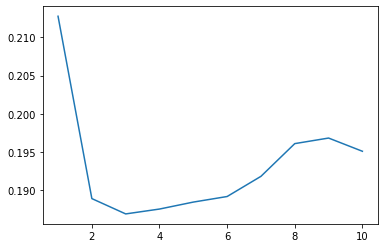

In [94]:
plt.plot(range(1,11), mean_score)

In [91]:
def find_best(model, folds_num, data, target):
    kf = KFold(n_splits = folds_num)
    kf.get_n_splits(data)
    mean_score = []
    for i in range(1,11):
        tmp_score = np.mean([model(i).fit(data[train_ind], target[train_ind])
                             .score(data[test_ind], target[test_ind])
                             for train_ind, test_ind in kf.split(data)])
        mean_score.append(tmp_score)
    print("Best score is ", np.max(mean_score),
          "\nNumber of neighbors is", np.argmax(mean_score) + 1)
    return mean_score
        

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf преобразование( sklearn.feature_extraction.text.TfidfTransformer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [95]:
mean_score2 = find_best(
    lambda n: MyKNeighborsClassifier(n_neighbors=n, metric='cosine'),
    3, matrix, target_new)

Best score is  0.2985278080697928 
Number of neighbors is 1


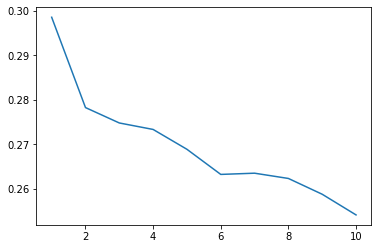

In [96]:
plt.plot(range(1,11), mean_score)

In [108]:
def find_best_tfidf(model, folds_num, data, target):
    transformer = TfidfTransformer()
    data = transformer.fit_transform(data, target)
    kf = KFold(n_splits = folds_num)
    kf.get_n_splits(data)
    mean_score = []
    for i in range(1,11):
        tmp_score = np.mean([model(i).fit(data[train_ind], target[train_ind])
                             .score(data[test_ind], target[test_ind])
                             for train_ind, test_ind in kf.split(data)])
        mean_score.append(tmp_score)
    print("Best score is ", np.max(mean_score),
          "\nNumber of neighbors is", np.argmax(mean_score) + 1)
    return mean_score

In [109]:
mean_score3 = find_best_tfidf(
    lambda n: MyKNeighborsClassifier(n_neighbors = n, metric='cosine'),
    3, matrix, target_new)

Best score is  0.6117775354416576 
Number of neighbors is 1


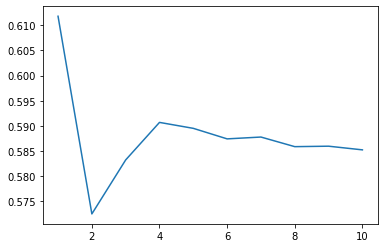

In [110]:
plt.plot(range(1,11), mean_score3)

In [117]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим качество(score) вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [118]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [126]:
data_test_new = [re.sub('[^a-zA-Z0-9]', ' ', s).lower() for s in data_test
             if len(re.sub('[^a-zA-Z0-9]', ' ', s).split()) > 0]
target_test_new = np.asarray([tar for _, tar in zip(data_test,target_test) 
             if len(re.sub('[^a-zA-Z0-9]', ' ', _).split()) > 0])
data_test_tok =  [s.split() for s in data_test_new]

In [127]:
matrix_test = vectoriser.transform(data_test_new)

In [128]:
mean_score4 = find_best_tfidf(
    lambda n: MyKNeighborsClassifier(n_neighbors=n, metric='cosine'),
    3, matrix_test, target_test_new)

Best score is  0.5814737740260925 
Number of neighbors is 8


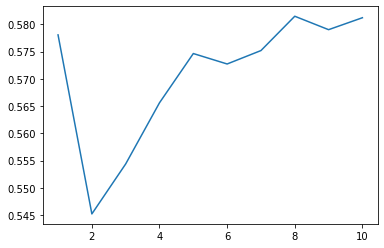

In [129]:
plt.plot(range(1,11), mean_score4)